# COLLEGE CLUSTERING
In this project, I will use the dataset of U.S. colleges previously scraped from [College Factual](https://www.collegefactual.com/). Clustering will be based on different attributes from each college, including the make up of students, number of majors/degrees offered, college tuition and availability of financial aid to students. I will use 3 clustering algorithms:
1. KMeans Clustering
2. Mean Shift Clustering
3. Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
import seaborn as sns

In [2]:
colleges_load = pd.read_csv('colleges_detailed.csv')

In [3]:
colleges_load.head()

,Rank,Name,Link,Location_City,Location_State,Private_Public,Profit_Type,Campus_Setting,Starting_Salary,Percent_from_State,...,Student_Faculty_Ratio,Num_Degree,Num_Major,Num_Field,Num_Annual_Grad,Percent_POC,Tuition_Fee,Room_Fee,Total_Cost,Financial_Aid
0,1,Duke University,duke-university,Durham,North Carolina,Private,Non-Profit,Large City,48000.0,16,...,7,61,48,20,2446,56.391876,53500,14798,71764,47836
1,2,Massachusetts Institute of Technology,massachusetts-institute-of-technology,Cambridge,Massachusetts,Private,Non-Profit,Midsize City,67000.0,10,...,3,39,37,16,1298,66.593358,49892,14720,67430,43248
2,3,University of Pennsylvania,university-of-pennsylvania,Philadelphia,Pennsylvania,Private,Non-Profit,Large City,54000.0,24,...,6,92,66,21,3531,56.811198,53534,15066,71715,44801
3,4,Yale University,yale-university,New Haven,Connecticut,Private,Non-Profit,Midsize City,48000.0,7,...,6,79,53,17,1566,55.273234,51400,15500,71290,50897
4,5,Harvard University,harvard-university,Cambridge,Massachusetts,Private,Non-Profit,Midsize City,48000.0,17,...,7,88,53,18,2642,57.139990,48949,16660,69600,49870


In [4]:
colleges_load.columns

Index(['Rank', 'Name', 'Link', 'Location_City', 'Location_State',
       'Private_Public', 'Profit_Type', 'Campus_Setting', 'Starting_Salary',
       'Percent_from_State', 'Percent_FTE', 'Percent_Male', 'Accept_rate',
       'Old_SAT_Score', 'New_SAT_Score', 'ACT_Score', 'Num_Undergrad',
       'Num_Faculty', 'Student_Faculty_Ratio', 'Num_Degree', 'Num_Major',
       'Num_Field', 'Num_Annual_Grad', 'Percent_POC', 'Tuition_Fee',
       'Room_Fee', 'Total_Cost', 'Financial_Aid'],
      dtype='object')

Exclude features that inherently classify colleges, such as `Private_Public`, `Profit_Type` and `Campus_Setting`. Additionally, drop all irrelevant features, such as `Rank`, `Link`, `Location_City` and `Location_State`.

In [5]:
colleges = colleges_load.copy()
colleges.drop(columns=['Private_Public', 'Profit_Type', 'Campus_Setting'], inplace=True)
colleges.drop(columns=['Rank', 'Link', 'Location_City', 'Location_State'], inplace=True)

In [6]:
colleges.head()

,Name,Starting_Salary,Percent_from_State,Percent_FTE,Percent_Male,Accept_rate,Old_SAT_Score,New_SAT_Score,ACT_Score,Num_Undergrad,...,Student_Faculty_Ratio,Num_Degree,Num_Major,Num_Field,Num_Annual_Grad,Percent_POC,Tuition_Fee,Room_Fee,Total_Cost,Financial_Aid
0,Duke University,48000.0,16,90,50,9.9,NaN,NaN,33.0,6696,...,7,61,48,20,2446,56.391876,53500,14798,71764,47836
1,Massachusetts Institute of Technology,67000.0,10,81,54,7.2,NaN,NaN,34.0,4547,...,3,39,37,16,1298,66.593358,49892,14720,67430,43248
2,University of Pennsylvania,54000.0,24,97,47,9.3,NaN,NaN,34.0,11716,...,6,92,66,21,3531,56.811198,53534,15066,71715,44801
3,Yale University,48000.0,7,73,51,6.9,NaN,NaN,34.0,5746,...,6,79,53,17,1566,55.273234,51400,15500,71290,50897
4,Harvard University,48000.0,17,86,51,5.2,NaN,NaN,34.0,9965,...,7,88,53,18,2642,57.139990,48949,16660,69600,49870


## Data cleaning

In [7]:
colleges.isnull().sum() / colleges.shape[0]

Name                     0.000000
Starting_Salary          0.431420
Percent_from_State       0.000000
Percent_FTE              0.000000
Percent_Male             0.000000
Accept_rate              0.000000
Old_SAT_Score            0.895468
New_SAT_Score            0.980665
ACT_Score                0.262840
Num_Undergrad            0.000000
Num_Faculty              0.000000
Student_Faculty_Ratio    0.000000
Num_Degree               0.000000
Num_Major                0.000000
Num_Field                0.000000
Num_Annual_Grad          0.000000
Percent_POC              0.000000
Tuition_Fee              0.000000
Room_Fee                 0.000000
Total_Cost               0.000000
Financial_Aid            0.000000
dtype: float64

Drop `Old_SAT_Score` and `New_SAT_Score`. Explore `ACT_Score` and `Starting_Salary` to see if possible to impute values.

In [8]:
colleges.drop(columns=['Old_SAT_Score','New_SAT_Score'], inplace=True)

<AxesSubplot:ylabel='Frequency'>

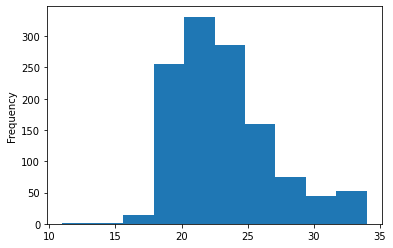

In [9]:
colleges['ACT_Score'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

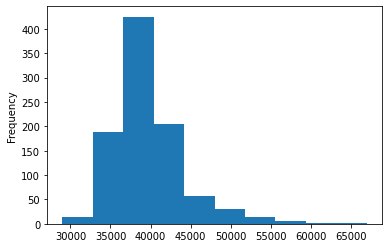

In [10]:
colleges['Starting_Salary'].plot.hist()

Both these features are skewed right. It is possible to correct for this skewness and mean-impute the missing values. However, we must first confirm whether the colleges with missing values are random, or whether a certain set of similar colleges have missing values. For example, low-ranked colleges are less likely to provide the ACT scores or inquire about the graduates' starting salaries; if we fill in nan values with the mean, then this would not be representative of these colleges.

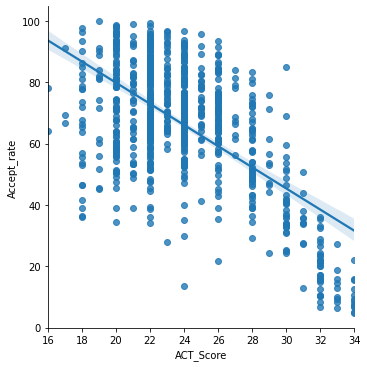

In [11]:
sns.lmplot(data=colleges.dropna(axis=0), x='ACT_Score', y='Accept_rate')

In [12]:
colleges.corr()['ACT_Score']['Accept_rate']

-0.46160406046936175

There looks to be a pretty good negative correlation between `ACT_Score` and `Accept_rate`, which makes sense. Schools that are more difficult to get in tend to require higher ACT scores and have lower acceptance rates. Therefore, we will regression impute the missing ACT scores using the acceptance rate.

In [13]:
res = sp.stats.linregress(colleges.dropna(axis=0)['Accept_rate'], colleges.dropna(axis=0)['ACT_Score'])
act_score_impute = colleges[['ACT_Score','Accept_rate']]
colleges['ACT_Score'] = act_score_impute.apply(lambda x: res.slope * x['Accept_rate'] + res.intercept if np.isnan(x['ACT_Score']) else x['ACT_Score'], axis=1)

Starting salary imputation: good correlation with `ACT_Score`, so we will regression impute `Starting_Salary`.

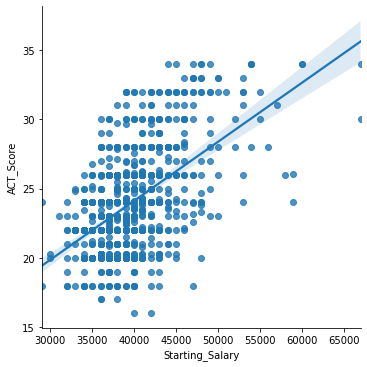

In [14]:
sns.lmplot(data=colleges.dropna(axis=0), x='Starting_Salary', y='ACT_Score')

In [15]:
colleges.corr()['Starting_Salary']['ACT_Score']

0.5405845292786804

In [16]:
res = sp.stats.linregress(colleges.dropna(axis=0)['ACT_Score'], colleges.dropna(axis=0)['Starting_Salary'])
salary_impute = colleges[['ACT_Score','Starting_Salary']]
colleges['Starting_Salary'] = salary_impute.apply(lambda x: res.slope * x['ACT_Score'] + res.intercept if np.isnan(x['Starting_Salary']) else x['Starting_Salary'], axis=1)

In [17]:
colleges.isnull().sum()

Name                     0
Starting_Salary          0
Percent_from_State       0
Percent_FTE              0
Percent_Male             0
Accept_rate              0
ACT_Score                0
Num_Undergrad            0
Num_Faculty              0
Student_Faculty_Ratio    0
Num_Degree               0
Num_Major                0
Num_Field                0
Num_Annual_Grad          0
Percent_POC              0
Tuition_Fee              0
Room_Fee                 0
Total_Cost               0
Financial_Aid            0
dtype: int64

## Data preparation
Now that all the NaN values are filled in, we will prepare the data for clustering, including normalizing and standardizing.

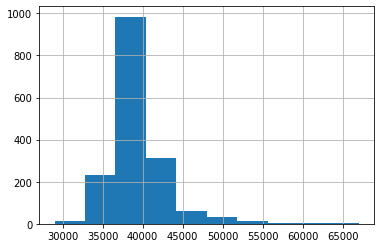

In [18]:
# Starting_Salary
colleges['Starting_Salary'].hist() # skewed right
colleges['Starting_Salary'] = np.log(colleges['Starting_Salary'])

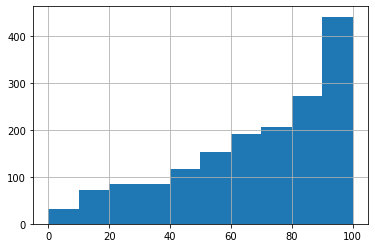

In [19]:
# Percent_from_State
colleges['Percent_from_State'].hist() # skewed left
colleges['Percent_from_State'] = np.square(colleges['Percent_from_State'])

<AxesSubplot:>

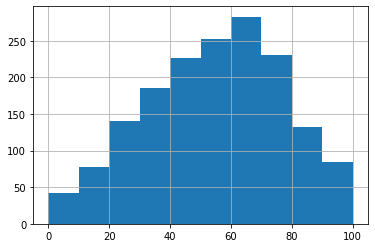

In [20]:
# Percent_FTE
colleges['Percent_FTE'].hist() # fairly Gaussian

<AxesSubplot:>

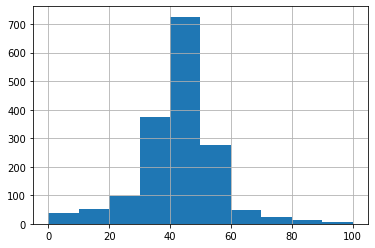

In [21]:
# Percent_Male
colleges['Percent_Male'].hist() # Gaussian

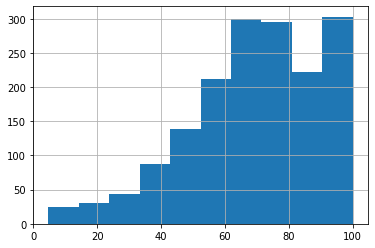

In [22]:
# Accept_rate
colleges['Accept_rate'].hist() # skewed left
colleges['Accept_rate'] = np.square(colleges['Accept_rate'])

<AxesSubplot:>

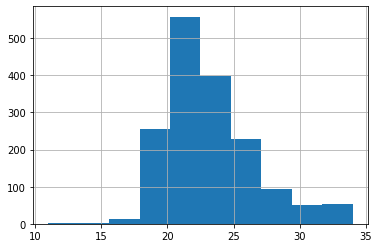

In [23]:
# ACT_Score
colleges['ACT_Score'].hist() # fairly normally-distributed

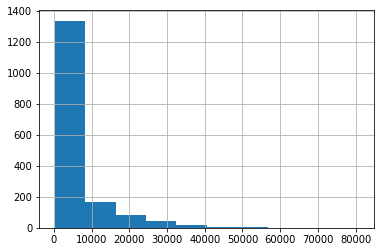

In [24]:
# Num_Undergrad
colleges['Num_Undergrad'].hist() # skewed right
colleges['Num_Undergrad'] = np.log(colleges['Num_Undergrad'])

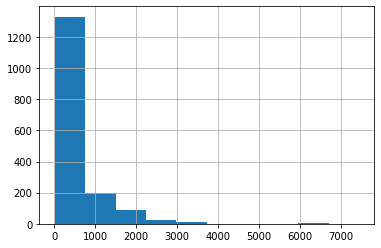

In [25]:
# Num_Faculty
colleges['Num_Faculty'].hist() # skewed right
colleges['Num_Faculty'] = np.log(colleges['Num_Faculty'])

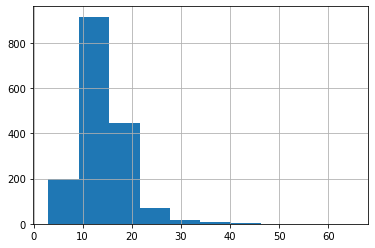

In [26]:
# Student_Faculty_Ratio
colleges['Student_Faculty_Ratio'].hist() # skewed right
colleges['Student_Faculty_Ratio'] = np.log(colleges['Student_Faculty_Ratio'])

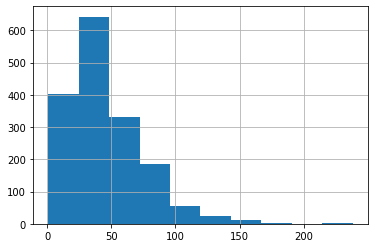

In [27]:
# Num_Degree
colleges['Num_Degree'].hist() # skewed right
colleges['Num_Degree'] = np.log(colleges['Num_Degree'])

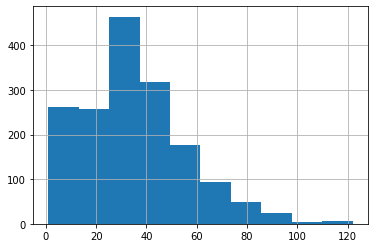

In [28]:
# Num_Major
colleges['Num_Major'].hist() # skewed right
colleges['Num_Major'] = np.log(colleges['Num_Major'])

<AxesSubplot:>

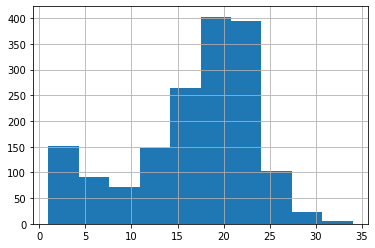

In [29]:
# Num_Field
colleges['Num_Field'].hist() # not too skewed

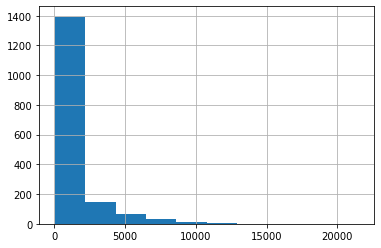

In [30]:
# Num_Annual_Grad
colleges['Num_Annual_Grad'].hist() # skewed right
colleges['Num_Annual_Grad'] = np.log(colleges['Num_Annual_Grad'])

<AxesSubplot:>

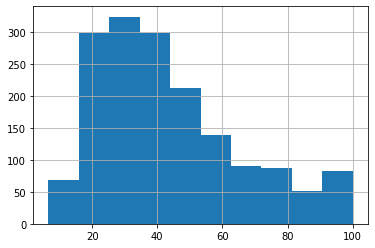

In [31]:
# Percent_POC
colleges['Percent_POC'].hist() # not too skewed

<AxesSubplot:>

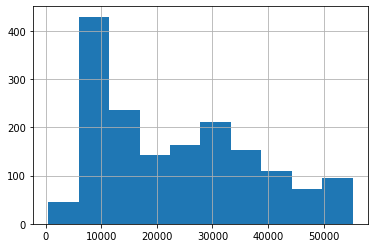

In [32]:
# Tuition_Fee
colleges['Tuition_Fee'].hist() # not too skewed

<AxesSubplot:>

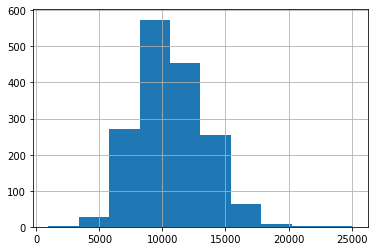

In [33]:
# Room_Fee
colleges['Room_Fee'].hist() # normally-distributed

<AxesSubplot:>

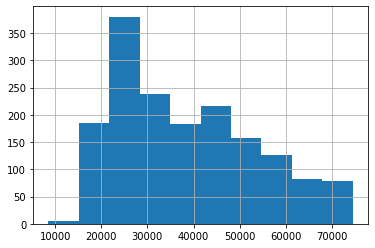

In [34]:
# Total_Cost
colleges['Total_Cost'].hist() # not too skewed

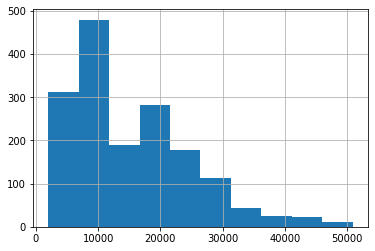

In [35]:
# Financial_Aid
colleges['Financial_Aid'].hist() # skewed right
colleges['Financial_Aid'] = np.log(colleges['Financial_Aid'])

In [36]:
# StandardScaler
scaler = StandardScaler()
colleges_np = np.array(colleges.iloc[:,1:])
colleges_np = scaler.fit_transform(colleges_np)

# CLUSTERING
## KMeans: 2 clusters

In [37]:
colleges_kmeans = pd.Series(cluster.KMeans(n_clusters=2, random_state=0).fit_predict(colleges_np))

In [38]:
rank = colleges_load[['Rank']]
private_public = pd.get_dummies(colleges_load[['Private_Public']], drop_first=True).iloc[:,0]
profit_type = pd.get_dummies(colleges_load[['Profit_Type']], drop_first=True).iloc[:,0]

Compare clusters with `Private_Public`: seems like the clusters are according to private vs. public, with p-value << 0.01

In [39]:
contingency_table = pd.crosstab(colleges_kmeans, private_public)
contingency_table

Private_Public_Public,0,1
row_0,,
0,1006,58
1,80,511


In [40]:
res = sp.stats.chi2_contingency(contingency_table)
pvalue = res[1]
pvalue

1.3864437862593258e-241

We can also compare our clusters with `Profit_Type`. However, we believe that `Profit_Type` would be related with `Private_Public` as private universities tend to be for profit and public colleges are more likely to be non-profit. We confirm this using a contingency table between these two features.

In [41]:
pd.crosstab(private_public, profit_type)

Profit_Type_Non-Profit,0,1
Private_Public_Public,,
0,96,990
1,569,0


## KMeans: 3 clusters

In [42]:
colleges_kmeans3_fit = cluster.KMeans(n_clusters=3, random_state=0).fit(colleges_np)
colleges_kmeans3 = pd.Series(colleges_kmeans3_fit.predict(colleges_np))

Let's print out some sample colleges from these 3 clusters.
1. Cluster 1: state universities, located at many campuses within a state.
2. Cluster 2: private universities
3. Cluster 3: medical/pharmacy/trade schools

In [43]:
colleges_load.loc[colleges_kmeans3==0, 'Name'].iloc[:10]

32             University of Virginia - Main Campus
34               University of Michigan - Ann Arbor
48           University of California - Los Angeles
49      University of North Carolina at Chapel Hill
65              University of California - Berkeley
69    Georgia Institute of Technology - Main Campus
72             University of California - San Diego
73                            University of Florida
74                 University of California - Davis
78                The University of Texas at Austin
Name: Name, dtype: object

In [44]:
colleges_load.loc[colleges_kmeans3==1, 'Name'].iloc[:10]

0                          Duke University
1    Massachusetts Institute of Technology
2               University of Pennsylvania
3                          Yale University
4                       Harvard University
5                      Harvey Mudd College
6                      Stanford University
7                    University of Chicago
8                        Dartmouth College
9                  Northwestern University
Name: Name, dtype: object

In [45]:
colleges_load.loc[colleges_kmeans3==2, 'Name'].iloc[:10]

62                          St Louis College of Pharmacy
111       Albany College of Pharmacy and Health Sciences
224                       Massachusetts Maritime Academy
238                           Soka University of America
247                               Maine Maritime Academy
250                                       Bellin College
270    SUNY College of Environmental Science and Fore...
282        Southern California Institute of Architecture
283                     Bryan College of Health Sciences
293               American University of Health Sciences
Name: Name, dtype: object

Let's see if we can use an elbow graph to determine how many clusters this set of colleges can be divided into.

In [46]:
kmeans_dict = {}
for k in range(2,20):
    kmeans_fit = cluster.KMeans(n_clusters=k, random_state=0).fit(colleges_np)
    kmeans_dict[k] = kmeans_fit.inertia_

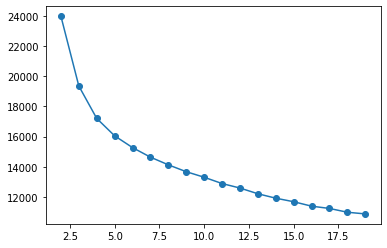

In [47]:
plt.plot(kmeans_dict.keys(), kmeans_dict.values())
plt.scatter(kmeans_dict.keys(), kmeans_dict.values())

Even it is not too clear where the elbow is, but let's just pick `k=5` and look at the cluster results.

In [48]:
colleges_kmeans5_fit = cluster.KMeans(n_clusters=5, random_state=0).fit(colleges_np)
colleges_kmeans5 = pd.Series(colleges_kmeans5_fit.predict(colleges_np))

Clusters are as follows:
1. Liberal arts colleges
2. Maritime/Health colleges
3. State universities with multiple campuses
4. Private colleges
5. Smaller public colleges

In [49]:
for k in range(0,5):
    print('Cluster {}'.format(k+1))
    print(colleges_load.loc[colleges_kmeans5==k, 'Name'].iloc[:5])
    print('\n')

Cluster 1
116        Wheaton College Illinois
128    Illinois Wesleyan University
134                Drake University
142            Saint Anselm College
146               Kalamazoo College
Name: Name, dtype: object


Cluster 2
62                       St Louis College of Pharmacy
111    Albany College of Pharmacy and Health Sciences
224                    Massachusetts Maritime Academy
238                        Soka University of America
247                            Maine Maritime Academy
Name: Name, dtype: object


Cluster 3
32           University of Virginia - Main Campus
34             University of Michigan - Ann Arbor
48         University of California - Los Angeles
49    University of North Carolina at Chapel Hill
65            University of California - Berkeley
Name: Name, dtype: object


Cluster 4
0                          Duke University
1    Massachusetts Institute of Technology
2               University of Pennsylvania
3                          Yale University
4   

## Mean-Shift Clustering

In [50]:
colleges_meanshift = cluster.MeanShift().fit_predict(colleges_np)

In [51]:
np.unique(colleges_meanshift)

array([0, 1, 2])

Clusters:
1. Private universities
2. Liberal arts colleges
3. Major-specific colleges (health, design, music)

In [52]:
for k in range(0,3):
    print('Cluster {}'.format(k+1))
    print(colleges_load.loc[colleges_meanshift==k, 'Name'].iloc[:5])
    print('\n')

Cluster 1
0                          Duke University
1    Massachusetts Institute of Technology
2               University of Pennsylvania
3                          Yale University
4                       Harvard University
Name: Name, dtype: object


Cluster 2
35                          Babson College
323         Chamberlain University - Texas
410    University of Minnesota - Rochester
418        Mount Carmel College of Nursing
462                 Sarah Lawrence College
Name: Name, dtype: object


Cluster 3
282    Southern California Institute of Architecture
293           American University of Health Sciences
560               New York School of Interior Design
590                     Cleveland Institute of Music
609              San Francisco Conservatory of Music
Name: Name, dtype: object




## Hierarchical Clustering

In [53]:
colleges_agglom = cluster.AgglomerativeClustering(n_clusters=7).fit_predict(colleges_np)

Clusters:
1. Public colleges
2. Engineering/polytechnic colleges
3. Liberal arts colleges
4. Private national universities
5. State universities with multiple campuses
6. Major-specific colleges
7. Other public colleges

In [54]:
for k in range(0,7):
    print('Cluster {}'.format(k+1))
    print(colleges_load.loc[colleges_agglom==k, 'Name'].iloc[:5])
    print('\n')

Cluster 1
311                                   Spelman College
389                                 Howard University
518          Pennsylvania State University - Hazleton
529    Pennsylvania State University - Wilkes - Barre
565            Pennsylvania State University - Dubois
Name: Name, dtype: object


Cluster 2
5                       Harvey Mudd College
29                             Olin College
35                           Babson College
45          Worcester Polytechnic Institute
52    Rose - Hulman Institute of Technology
Name: Name, dtype: object


Cluster 3
116        Wheaton College Illinois
128    Illinois Wesleyan University
134                Drake University
142            Saint Anselm College
146               Kalamazoo College
Name: Name, dtype: object


Cluster 4
0                          Duke University
1    Massachusetts Institute of Technology
2               University of Pennsylvania
3                          Yale University
4                       Harvard Un

## Summary
Overall, we see that each algorithm is able to yield different sets of clusters, but the same theme keeps appearing. Private national universities mostly cluster together, whereas state universities usually end up in the same cluster. Schools that are more specific for a particular major/degree, such as engineering schools or health sciences schools tend to group together, whereas smaller liberal arts school usually end up in the same cluster.

We are also able to observe that different algorithms, namely *KMeans*, *Hierarchical* and *Mean-Shift* can yield different clusters, even if the number of clusters is the same. Therefore, it is necessary to compare and contrast clustering results from different techniques to get the results desired.

## Tableau Viz
Since each college entry includes the college location (city, state), this dataset can be efficiently and beautifully visualized using Tableau. Tableau uses the city/state location to automatically generate the latitude and longitude of each location, thus providing nice visualization on the U.S. map (excluding Alaska for better rendering).

Below, in the top 2 panels, I show the acceptance rate and percent availability of financial aid by state, superimposed on the map. This map shows colleges on the West Coast and East Coast have lower acceptance rates but are able to award more financial to their students. This notion is corroborated by the regression analysis in the bottom panel, showing good negative linear correlation between acceptance rate and financial aid percentage. 

Additionally, the last graph illustrates an interesting idea: colleges that cost more can produce graduates who get high salary. Notably, the cheapest colleges and the most expensive colleges have high full-time enrollment rate, but middling-cost colleges have more part-time students.

All in all, Tableau provides beautiful and eye-catching representations of this dataset.

In [5]:
%%html
<div class='tableauPlaceholder' id='viz1614286276299' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ta&#47;Tableau_colleges&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Tableau_colleges&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ta&#47;Tableau_colleges&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1614286276299');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1477px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [4]:
from IPython.core.display import display, HTML
s="<div class='tableauPlaceholder' id='viz1614286276299' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ta&#47;Tableau_colleges&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Tableau_colleges&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ta&#47;Tableau_colleges&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1614286276299');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1477px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>"
display(HTML(s))